In [1]:
from ExoRIM.data_generator import SimpleGenerator
from ExoRIM.train import Training
import matplotlib.pyplot as plt

/home/aadam/anaconda3/envs/Base3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/aadam/anaconda3/envs/Base3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [11]:
gen = SimpleGenerator(1000)

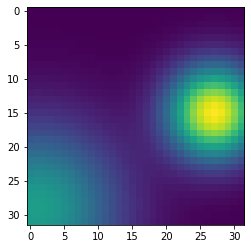

In [18]:
plt.imshow(gen.images[700, :, :])

In [23]:
from ExoRIM.model import RIM, MSE, PhysicalModel
import tensorflow as tf
pixels = 32
noise = 0.01

# First test call execution
rim = RIM(steps=10, pixels=32, state_size=4, state_depth=2, noise_std=0.1, num_cell_features=2)
phys = rim.physical_model
image = tf.ones((1, pixels, pixels, 1))  # x
noisy_image = phys.simulate_noisy_image(image)  # y
rim(noisy_image)

# Test training
loss = MSE()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# train a single epoch
with tf.GradientTape() as tape:
    tape.watch(rim.variables)
    output = rim.call(noisy_image)
    cost_value = loss.call(x_true=image, x_preds=output)

initializing Phys_Mod
Creating from coordinate file
15 distinct baselines were identified
10 Kernel Phases identified.
Now calculating bispectrum
Calculating bispectrum matrix. Will take a few minutes.
Done 0 of 6 .  10  bispectra found. Time taken: 0.0 sec
Done. Total time taken: 0.0 mins
Found 20 bispectra
Doing sparse svd
Matrix rank: 10
Reduced-rank bispectrum matrix calculated.
Matrix shape (10, 15)
Time taken: 0.0 mins
Loaded coords.txt


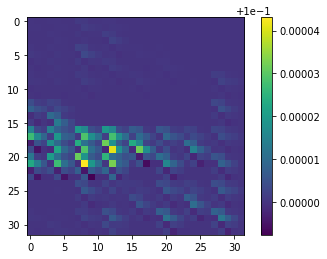

In [19]:
fig = plt.figure()
plot = plt.imshow(output.numpy()[0, :, :, 0, -1])
fig.colorbar(plot)

In [20]:
tf.reduce_sum(tf.square(output[0, :, :, 0, -1] - gen.images[700, :, :]))

<tf.Tensor: id=16787, shape=(), dtype=float32, numpy=540.83777>

In [22]:
output[0, :, :, 0, -1].numpy().min()

0.09999241

In [15]:
gen.images[700, :, :].max()

1.0